## Basic Imports and Data Frame Explorations

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [3]:
#Part way through this analysis, the 'future warnings' became a nuisance when utilizing the Seaborn Library. 
import warnings
warnings.filterwarnings("ignore")

In [7]:
#Import libraries and load csv file
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('./gym_members_exercise_tracking.csv')
df.head()

Age  Gender  Weight (kg)  Height (m)  Max_BPM  Avg_BPM  Resting_BPM  \
0   56    Male         88.3        1.71      180      157           60   
1   46  Female         74.9        1.53      179      151           66   
2   32  Female         68.1        1.66      167      122           54   
3   25    Male         53.2        1.70      190      164           56   
4   38    Male         46.1        1.79      188      158           68   

   Session_Duration (hours)  Calories_Burned Workout_Type  Fat_Percentage  \
0                      1.69           1313.0         Yoga            12.6   
1                      1.30            883.0         HIIT            33.9   
2                      1.11            677.0       Cardio            33.4   
3                      0.59            532.0     Strength            28.8   
4                      0.64            556.0     Strength            29.2   

   Water_Intake (liters)  Workout_Frequency (days/week)  Experience_Level  \
0                    3.5                              4                 3   
1                    2.1                              4                 2   
2                    2.3                              4                 2   
3                    2.1                              3                 1   
4                    2.8                              3                 1   

     BMI  
0  30.20  
1  32.00  
2  24.71  
3  18.41  
4  14.39

In [9]:
#973 entries to explore
#Checking for data cleaning requirements first

#Info appears to show no issues
df.info()

#But as one final check, will explore if any indices come up with NaN... also no issue found
df.isnull().values.any()

#Column Name updates to make formula writing a bit simpler (no spaces)
df = df.rename(columns={'Weight (kg)':'Weight_kg','Height (m)':'Height_m','Session_Duration (hours)':'Session_Duration_hours','Water_Intake (liters)':'Water_Intake_liters','Workout_Frequency (days/week)':'Workout_Frequency_days_per_week'})

#We can quickly outline which variables are categorical and which are numeric
categorical = [item for item in df.columns if df[item].dtype == 'O']
numeric = [item for item in df.columns if item not in categorical]
print(f'Categorical Variables: {categorical}')
print(f'Numerica Variables: {numeric}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            973 non-null    int64  
 1   Gender                         973 non-null    object 
 2   Weight (kg)                    973 non-null    float64
 3   Height (m)                     973 non-null    float64
 4   Max_BPM                        973 non-null    int64  
 5   Avg_BPM                        973 non-null    int64  
 6   Resting_BPM                    973 non-null    int64  
 7   Session_Duration (hours)       973 non-null    float64
 8   Calories_Burned                973 non-null    float64
 9   Workout_Type                   973 non-null    object 
 10  Fat_Percentage                 973 non-null    float64
 11  Water_Intake (liters)          973 non-null    float64
 12  Workout_Frequency (days/week)  973 non-null    int

In [11]:
#A quick look at the object variables also
#df.Gender.value_counts()
#df.Workout_Type.value_counts()

"""
Gender
Male      511
Female    462

Workout_Type
Strength    258
Cardio      255
Yoga        239
HIIT        221
"""

#Basic Stats Exploration for the numeric fields
df.describe()

Age   Weight_kg   Height_m     Max_BPM     Avg_BPM  Resting_BPM  \
count  973.000000  973.000000  973.00000  973.000000  973.000000   973.000000   
mean    38.683453   73.854676    1.72258  179.883864  143.766701    62.223022   
std     12.180928   21.207500    0.12772   11.525686   14.345101     7.327060   
min     18.000000   40.000000    1.50000  160.000000  120.000000    50.000000   
25%     28.000000   58.100000    1.62000  170.000000  131.000000    56.000000   
50%     40.000000   70.000000    1.71000  180.000000  143.000000    62.000000   
75%     49.000000   86.000000    1.80000  190.000000  156.000000    68.000000   
max     59.000000  129.900000    2.00000  199.000000  169.000000    74.000000   

       Session_Duration_hours  Calories_Burned  Fat_Percentage  \
count              973.000000       973.000000      973.000000   
mean                 1.256423       905.422405       24.976773   
std                  0.343033       272.641516        6.259419   
min                  0.500000       303.000000       10.000000   
25%                  1.040000       720.000000       21.300000   
50%                  1.260000       893.000000       26.200000   
75%                  1.460000      1076.000000       29.300000   
max                  2.000000      1783.000000       35.000000   

       Water_Intake_liters  Workout_Frequency_days_per_week  Experience_Level  \
count           973.000000                       973.000000        973.000000   
mean              2.626619                         3.321686          1.809866   
std               0.600172                         0.913047          0.739693   
min               1.500000                         2.000000          1.000000   
25%               2.200000                         3.000000          1.000000   
50%               2.600000                         3.000000          2.000000   
75%               3.100000                         4.000000          2.000000   
max               3.700000                         5.000000          3.000000   

              BMI  
count  973.000000  
mean    24.912127  
std      6.660879  
min     12.320000  
25%     20.110000  
50%     24.160000  
75%     28.560000  
max     49.840000

## Categorical Variables Charts

Gender        Female  Male
Workout_Type              
Cardio           126   129
HIIT             107   114
Strength         123   135
Yoga             106   133


<Figure size 640x480 with 0 Axes>

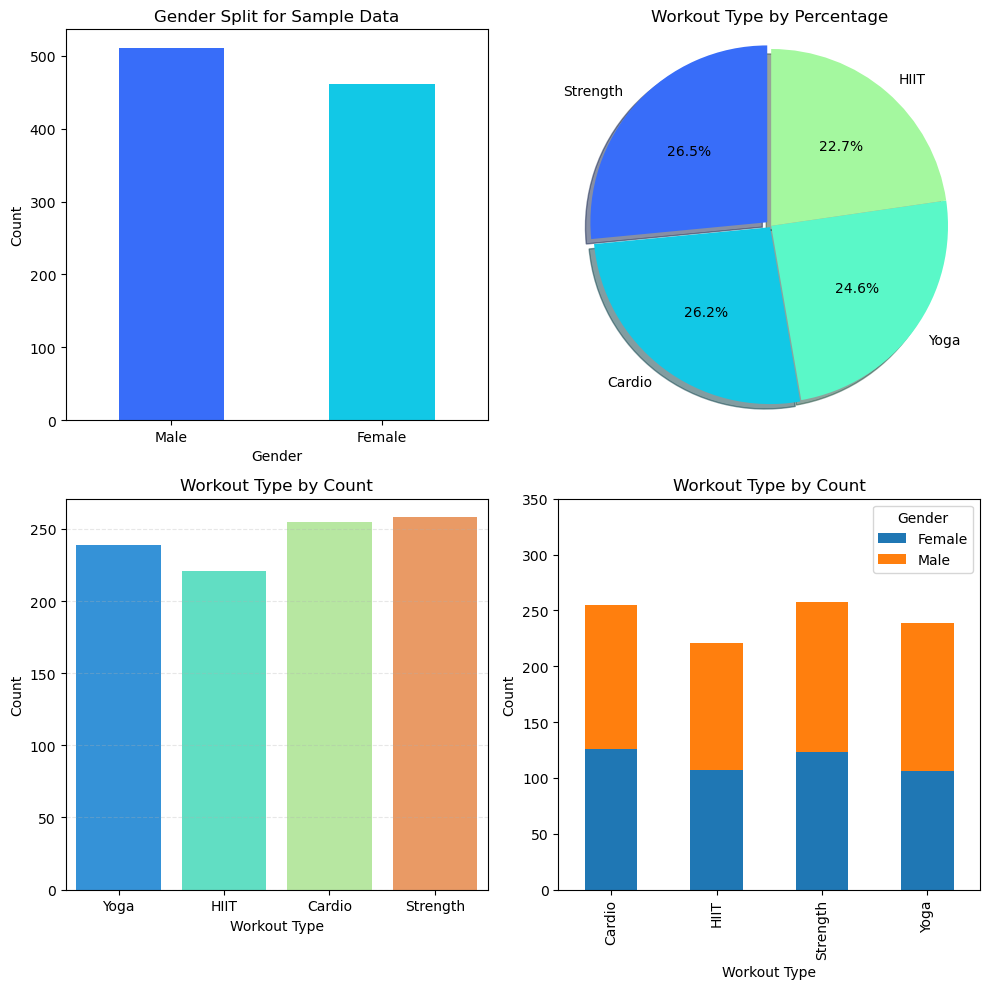

In [13]:
#Basic Plots for categorical data, workout type and also workout type by Gender
plt.clf()
fig, axes = plt.subplots(2, 2, figsize=(10,10))
axes = axes.flatten()

df['Gender'].value_counts().plot.bar(ax=axes[0],rot=0,color=sns.color_palette('rainbow'))
axes[0].set_title('Gender Split for Sample Data')
axes[0].set_ylabel('Count')
axes[0].set_xlabel('Gender')

expl_list = [.03,.01,0,0]
df['Workout_Type'].value_counts().plot.pie(autopct='%1.1f%%',colors=sns.color_palette('rainbow'), startangle=90, explode=expl_list,shadow=True,ax=axes[1])
axes[1].set_title('Workout Type by Percentage')
axes[1].set_ylabel('')
axes[1].axis('equal')

sns.countplot(df,x='Workout_Type',ax=axes[2],palette='rainbow')
axes[2].grid(visible=True,axis='y',linestyle='--',alpha=.3)
axes[2].set_xlabel('Workout Type')
axes[2].set_ylabel('Count')
axes[2].set_title('Workout Type by Count')

pivot = pd.pivot_table(df,columns='Gender',index='Workout_Type',aggfunc='size')
pivot.plot.bar(stacked=True,ax=axes[3])
axes[3].set_xlabel('Workout Type')
axes[3].set_ylabel('Count')
axes[3].set_title('Workout Type by Count')
axes[3].set_ylim(0,350)

print(pivot)

plt.tight_layout()  # Adjust layout to avoid overlapping
plt.show()

## Category Findings
* No major split between Male and Female in exercise data, though Male records are higher in volume for the dataset and therefore should be monitored for causing potential bias
* Workout types led by Strength Training category, but with a narrow margin


## Numerical Distributions

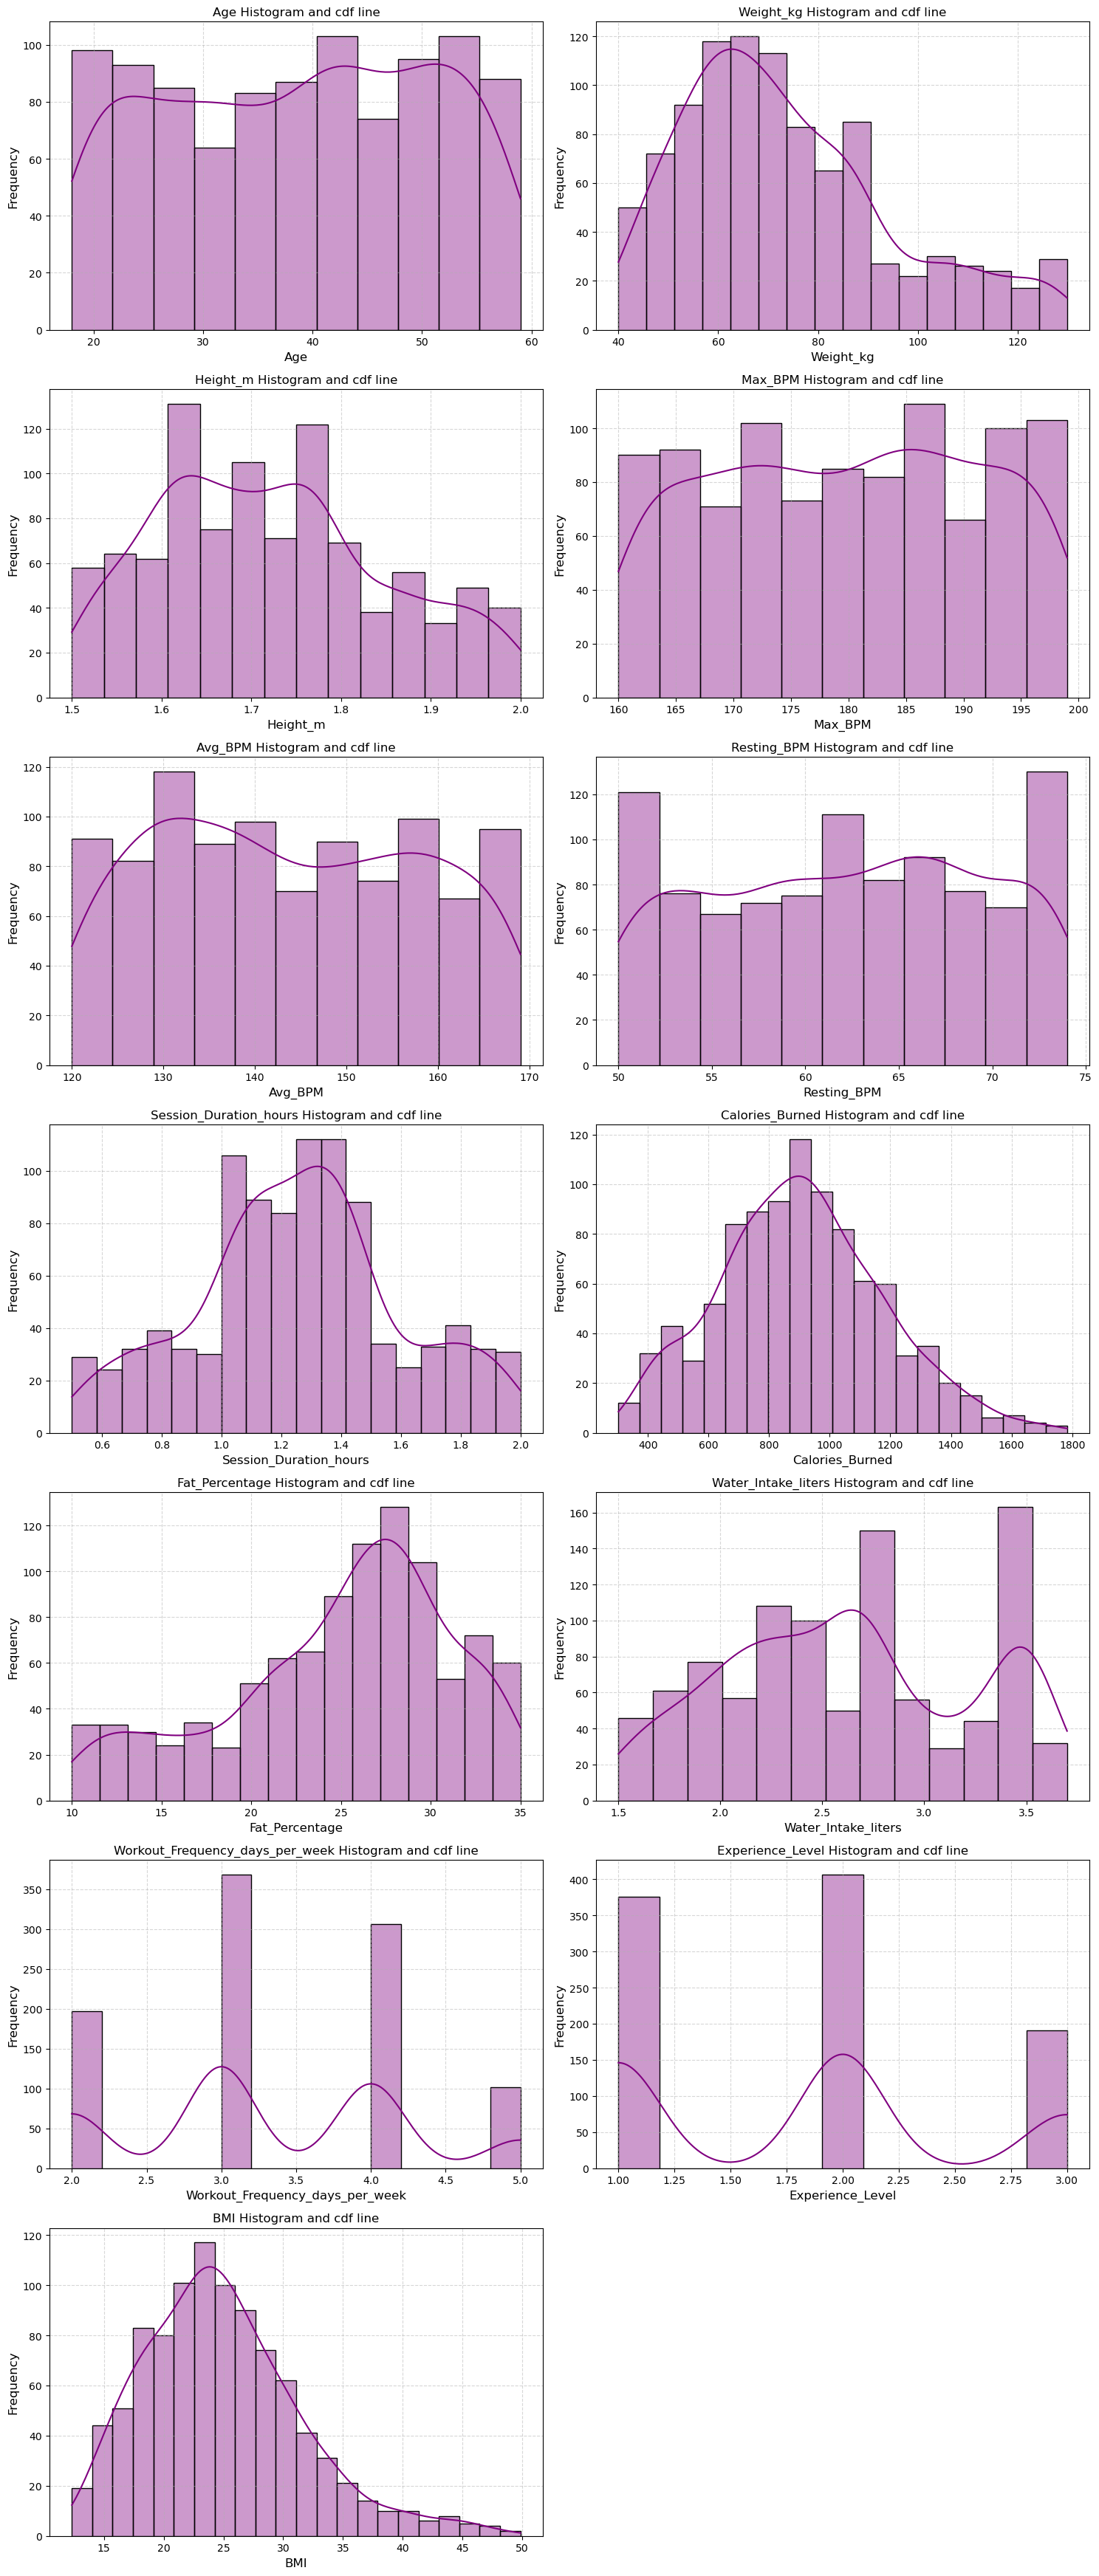

In [15]:
#Let's explore the basic data distributions for numeric fields and check for any noteworthy

#Make a figure for all the charts
col_count = 2
row_count = (len(numeric)+1) // col_count

fig, axes = plt.subplots(row_count, col_count, figsize=(15,5*row_count))
axes = axes.flatten() #Have to do this for the for loop coming next

for i, j in enumerate(numeric):
    sns.histplot(df[j], kde=True,palette='dark',color='purple',alpha=.4, ax=axes[i])
    axes[i].set_xlabel(j,fontsize=12)
    axes[i].set_ylabel('Frequency',fontsize=12)
    axes[i].grid(visible=True,axis='both',linestyle='--',alpha=.5)
    axes[i].set_title(f'{j} Histogram and cdf line')

for item in range(i + 1, len(axes)):
    fig.delaxes(axes[item])

plt.tight_layout()  # Adjust layout to avoid overlapping
plt.show()

## Numerical Distribution Findings

* **Skewed Right:** Weight and BMI
* **Skewed Left:** Fat Percentage
* **Numeric Ordinal:** Workout Frequency and Experience Level

## Outliers Investigation

In [17]:
#Creating functions for investigating outliers and returning a DataFrame

#Z-Scores are better for normal distributions
def outlier_zscore(data):
    if data.dtype != 'O':
        scores = (data-np.mean(data)) / np.std(data)
        return df[(scores < -3) | (scores > 3)] #Uses same indices as df since data is a column from df as source

outliers = outlier_zscore(df['Calories_Burned']) #Testing of distribution with roughly normal form from distribution reviews
outliers

Age Gender  Weight_kg  Height_m  Max_BPM  Avg_BPM  Resting_BPM  \
511   39   Male       86.2      1.82      191      160           72   
712   19   Male       82.4      1.96      174      169           62   
910   32   Male       89.8      1.92      199      168           67   

     Session_Duration_hours  Calories_Burned Workout_Type  Fat_Percentage  \
511                    1.96           1725.0     Strength            10.2   
712                    1.90           1766.0         HIIT            10.1   
910                    1.93           1783.0     Strength            10.6   

     Water_Intake_liters  Workout_Frequency_days_per_week  Experience_Level  \
511                  3.5                                5                 3   
712                  3.5                                5                 3   
910                  3.5                                4                 3   

       BMI  
511  26.02  
712  21.45  
910  24.36

In [19]:
#IQR method is better for skewed distributions
def outlier_IQR(data):
    if data.dtype != 'O':
        Q1 = np.percentile(data,25)
        Q3 = np.percentile(data,75)
        IQR = Q3-Q1
        low_val = Q1 - 1.5*IQR
        high_val = Q3 + 1.5*IQR
        scores = df[(data < low_val) | (data > high_val)]
        return scores

outliers = outlier_IQR(df['Weight_kg']) #Testing of distribution with clear right skew from distribution reviews
outliers

Age Gender  Weight_kg  Height_m  Max_BPM  Avg_BPM  Resting_BPM  \
96    56   Male      129.0      1.78      194      126           64   
122   56   Male      129.5      1.95      160      129           66   
180   20   Male      128.2      1.84      164      132           58   
283   20   Male      128.4      1.92      167      145           57   
291   55   Male      128.4      1.68      178      165           52   
593   55   Male      129.9      1.73      187      155           60   
614   28   Male      128.4      1.86      173      158           71   
648   19   Male      127.9      1.93      185      168           70   
854   48   Male      129.2      1.61      193      167           62   

     Session_Duration_hours  Calories_Burned Workout_Type  Fat_Percentage  \
96                     1.29            805.0         Yoga            27.1   
122                    1.00            639.0     Strength            25.2   
180                    0.83            603.0         HIIT            26.2   
283                    0.63            502.0       Cardio            26.1   
291                    1.13            923.0       Cardio            20.4   
593                    0.69            529.0         Yoga            21.7   
614                    1.06            921.0     Strength            23.6   
648                    1.27           1173.0     Strength            21.8   
854                    1.06            876.0         Yoga            21.4   

     Water_Intake_liters  Workout_Frequency_days_per_week  Experience_Level  \
96                   2.7                                2                 1   
122                  3.5                                2                 1   
180                  2.3                                3                 1   
283                  2.0                                2                 1   
291                  2.6                                4                 2   
593                  3.1                                3                 1   
614                  3.3                                4                 2   
648                  3.0                                4                 2   
854                  2.9                                4                 2   

       BMI  
96   40.71  
122  34.06  
180  37.87  
283  34.83  
291  45.49  
593  43.40  
614  37.11  
648  34.34  
854  49.84

<Figure size 640x480 with 0 Axes>

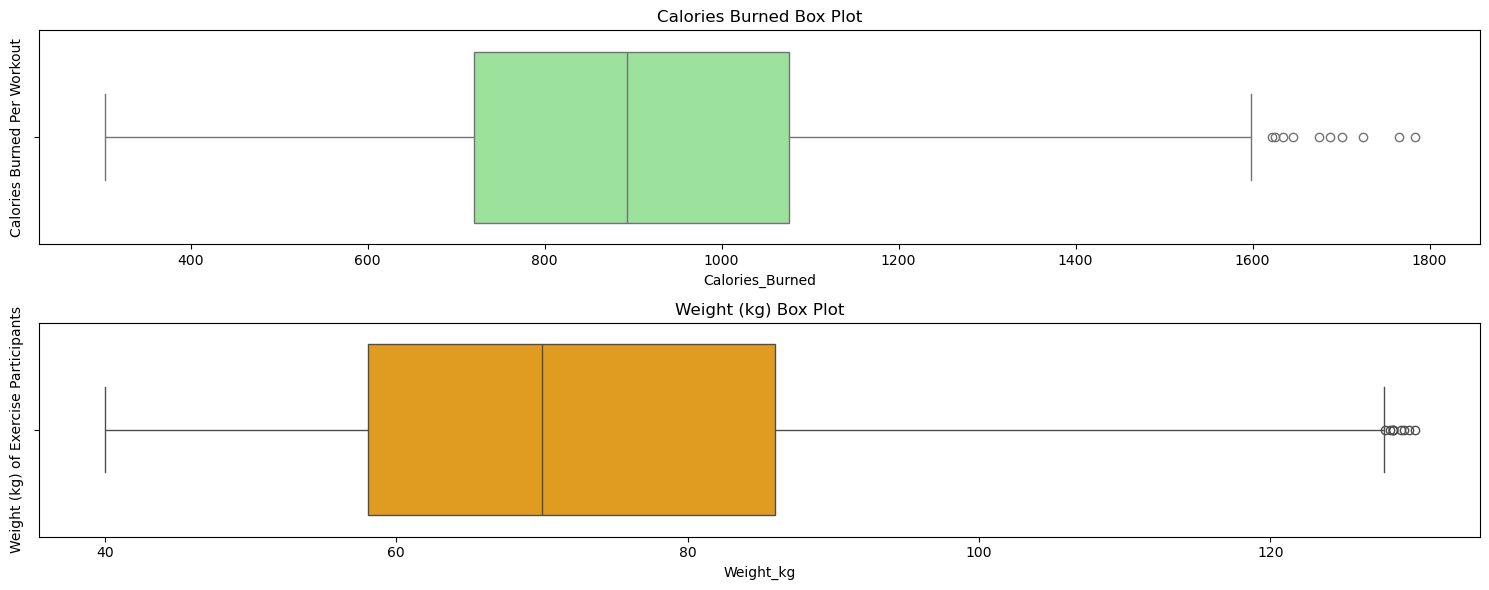

In [21]:
#We can do some visual investigation of the distributions for IQRs and Outliers as well

#Found out the hard way that boxplots don't play well with subplots due to their flexibility for 'making their own subplots' =)
#fig, axes = plt.subplots(1,2, figsize=(20,20))
#axes = axes.flatten() #Makes addressing the figures simpler

plt.clf()
plt.figure(figsize=(15,6))
plt.subplot(2,1,1)
#sns.boxplot(df,y='Calories_Burned',orient='v',color=sns.color_palette('rainbow'))
sns.boxplot(df,x='Calories_Burned',orient='h',color='lightgreen')
plt.ylabel('Calories Burned Per Workout')
plt.title('Calories Burned Box Plot')

plt.subplot(2,1,2)
sns.boxplot(df,x='Weight_kg',orient='h',color='orange')
plt.ylabel('Weight (kg) of Exercise Participants')
plt.title('Weight (kg) Box Plot')

plt.tight_layout(w_pad=4) #Adding some space to help with crowdingg
plt.show()

<Figure size 640x480 with 0 Axes>

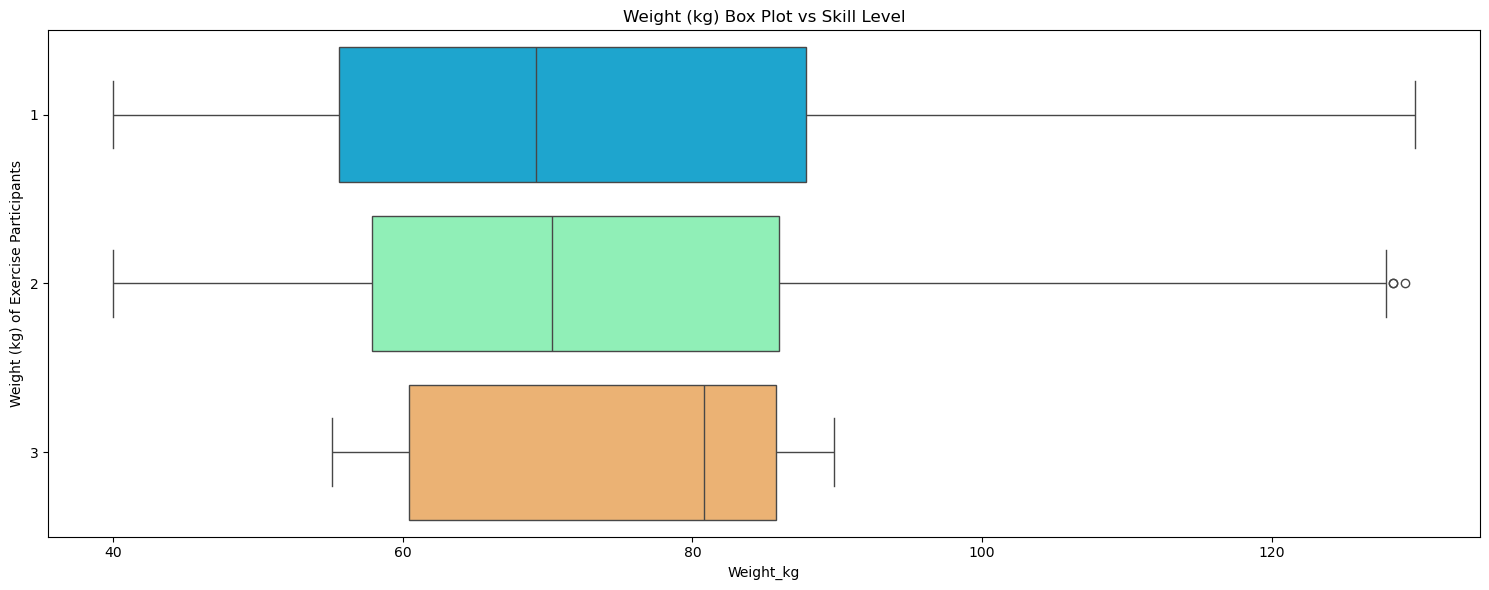

In [23]:
#I also wanted to explore Box Plot splitting based on the Experience Level
plt.clf()
plt.figure(figsize=(15,6))

plt.subplot(1,1,1)
sns.boxplot(df,y='Experience_Level',x='Weight_kg',orient='h',palette='rainbow')
plt.ylabel('Weight (kg) of Exercise Participants')
plt.title('Weight (kg) Box Plot vs Skill Level')

plt.tight_layout(w_pad=4) #Adding some space to help with crowding
plt.show()

## Outliers Findings
* Functions are available for compiling lists of outliers
* Box Plots are an easy means of identifying outliers, but scenarios where outliers are relevant are already clear from initial distributions
* In regards to weight, it is clear that the weight ranges of Experience Level 1 and 2 are much more spread out, but weight ranges do progressively tighten. 
    * Of more interest, the median weight continues to rise until Exp. Level 3, likely due to more muscle and higher muscle density 

## Distributions vs. Workout Frequency

<Figure size 640x480 with 0 Axes>

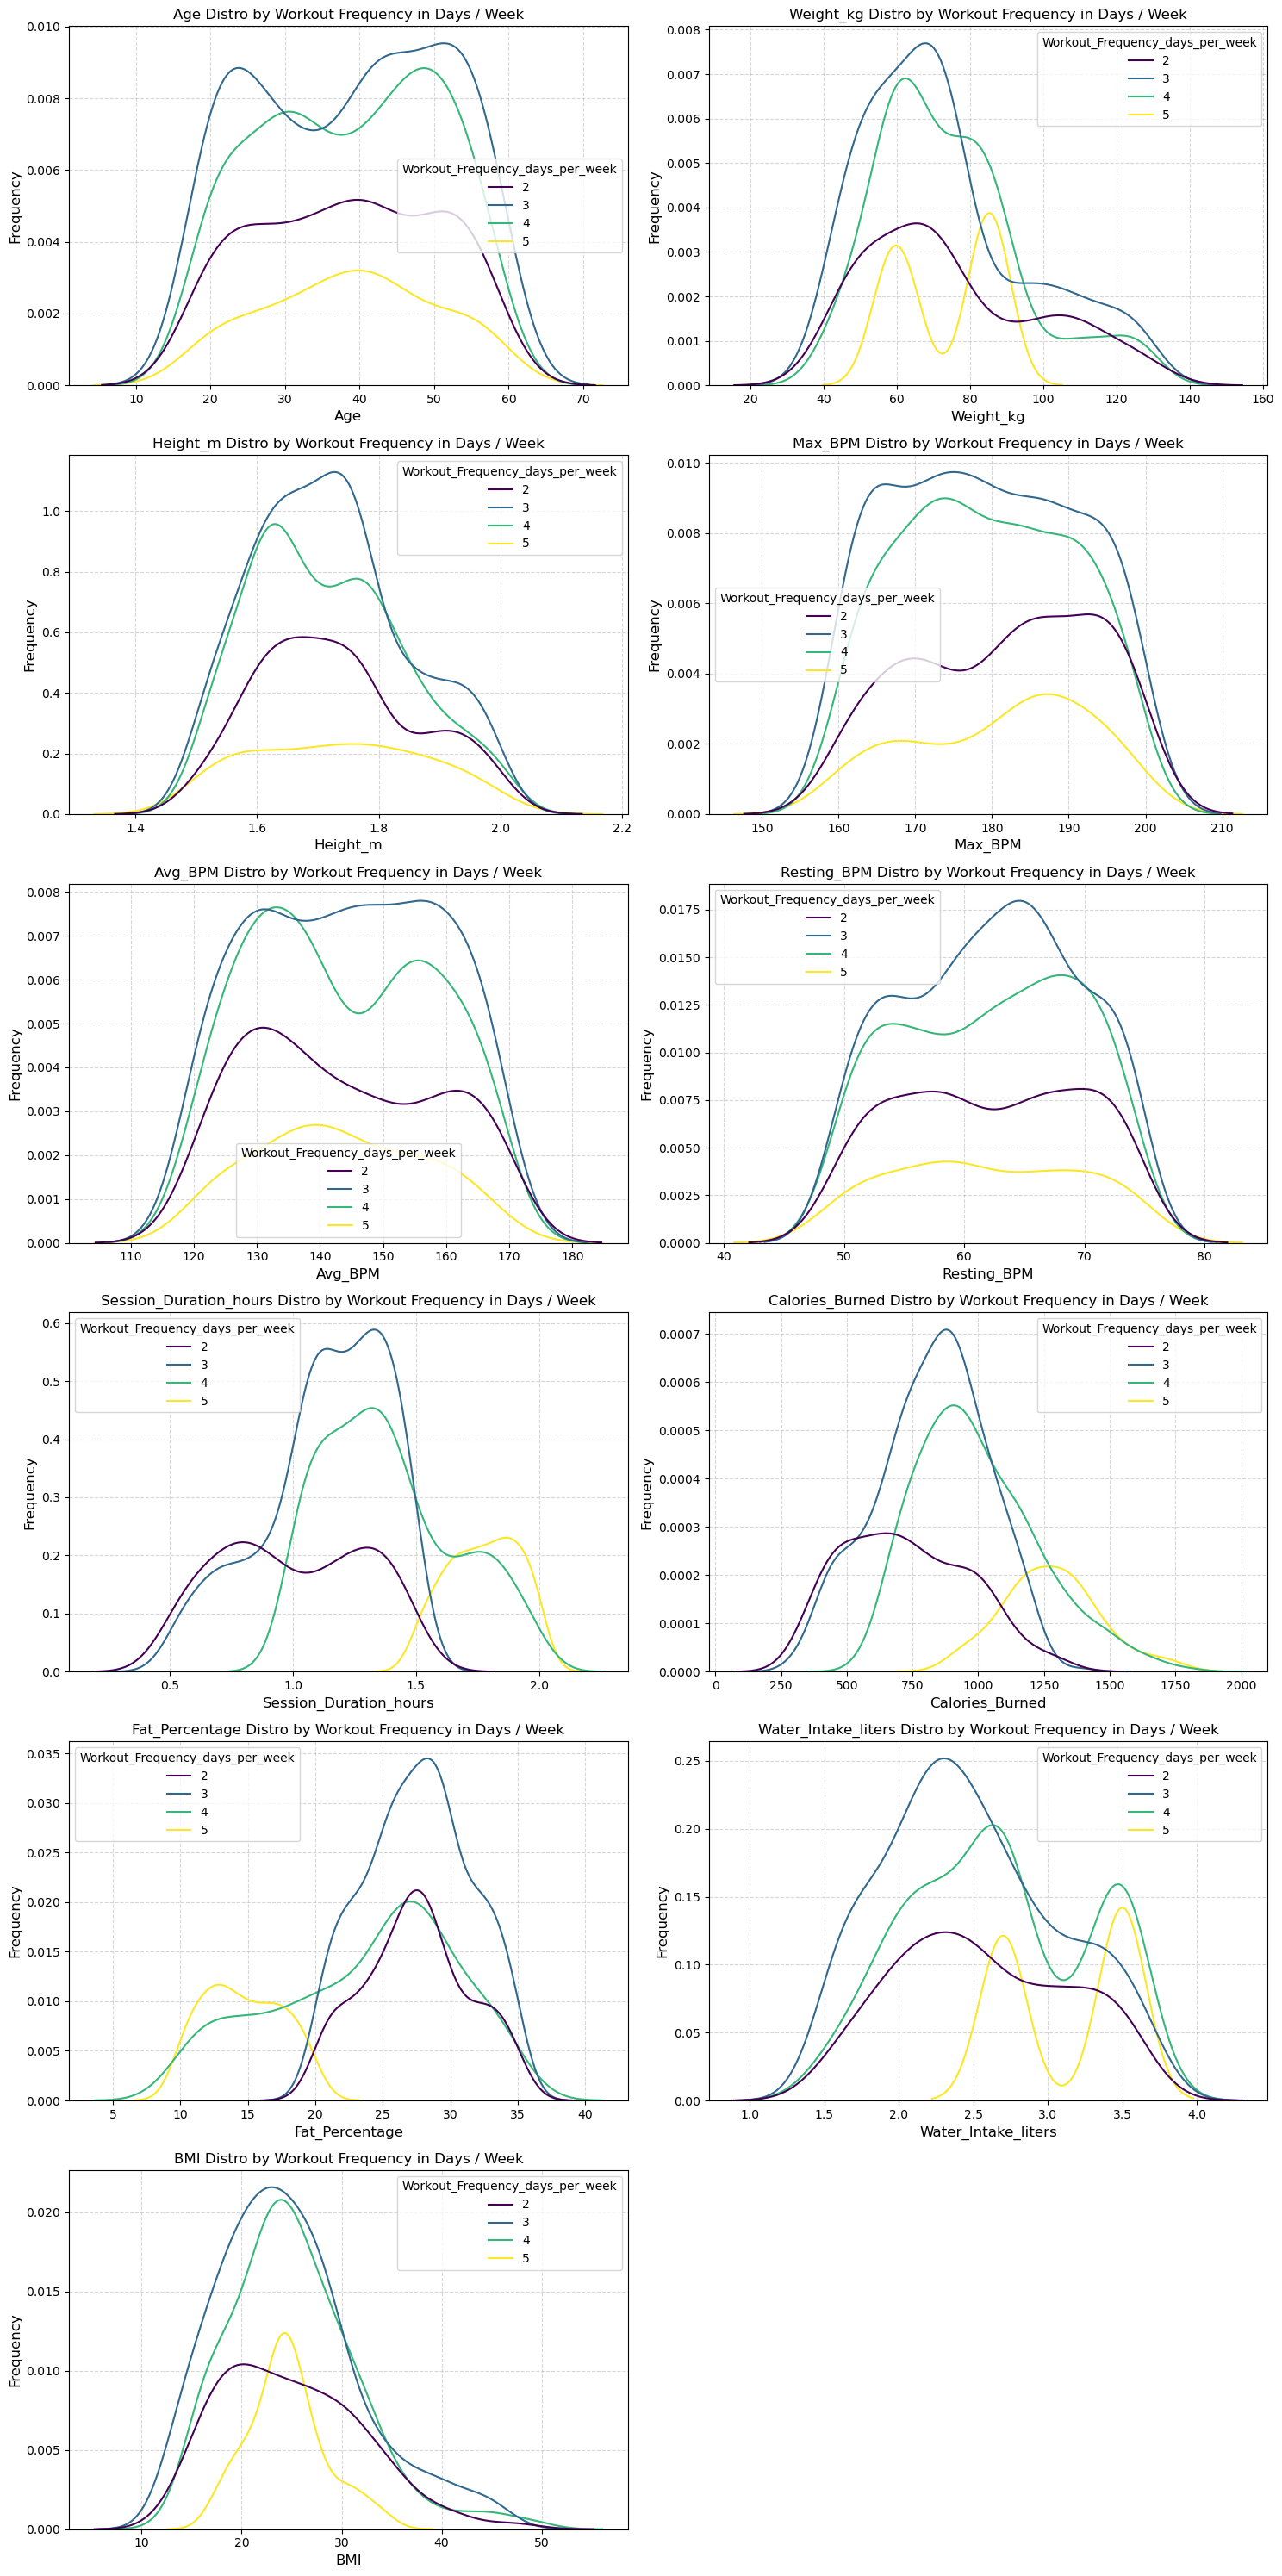

In [25]:
#Using the Ordinal Variables (Workout Frequency and Experience Level), we can do some additional distribution explorations

#Clear plt
plt.clf()

#Set up a sub_df for non_ordinal
Ord_List = ["Workout_Frequency_days_per_week","Experience_Level"]
Non_Ord_df = [col for col in numeric if col not in Ord_List]

col_count = 2
row_count = (len(Non_Ord_df)+1) // col_count

fig, axes = plt.subplots(row_count, col_count, figsize=(15,5*row_count))
axes = axes.flatten() #Have to do this for the for loop coming next

for i, j in enumerate(Non_Ord_df):
    sns.kdeplot(df,x=j,hue=Ord_List[0],palette='viridis',ax=axes[i])
    axes[i].set_xlabel(j,fontsize=12)
    axes[i].set_ylabel('Frequency',fontsize=12)
    axes[i].grid(visible=True,axis='both',linestyle='--',alpha=.5)
    axes[i].set_title(f'{j} Distro by Workout Frequency in Days / Week')

for item in range(i + 1, len(axes)):
    fig.delaxes(axes[item])

plt.tight_layout()  # Adjust layout to avoid overlapping
plt.show()

## Distribution Findings vs. Workout Frequency

* Weight_kg for 2-4 days per week group seems to center on mode: ~70kg, but is bi-modal at ~60 and ~85kg in 5 days per week group. This could be due to exercise types typically requiring higher frequencies at varied intensity / time levels (running vs. weight lifting). Would require additional data to investigate fully.
* Fat_Percentage for 2-4 days per week group seems to center on mode: ~27, but is mode: ~12 in 5 days per week group
* BMI distribution tightens significantly (lower std dev) for 5 days per week group
* Water Intake is bi-modal for 4 and 5 days per week groups, could be due to exercise types typically requiring higher frequencies at varied intensity / time levels (running vs. weight lifting).

## Distributions vs. Experience Level

<Figure size 640x480 with 0 Axes>

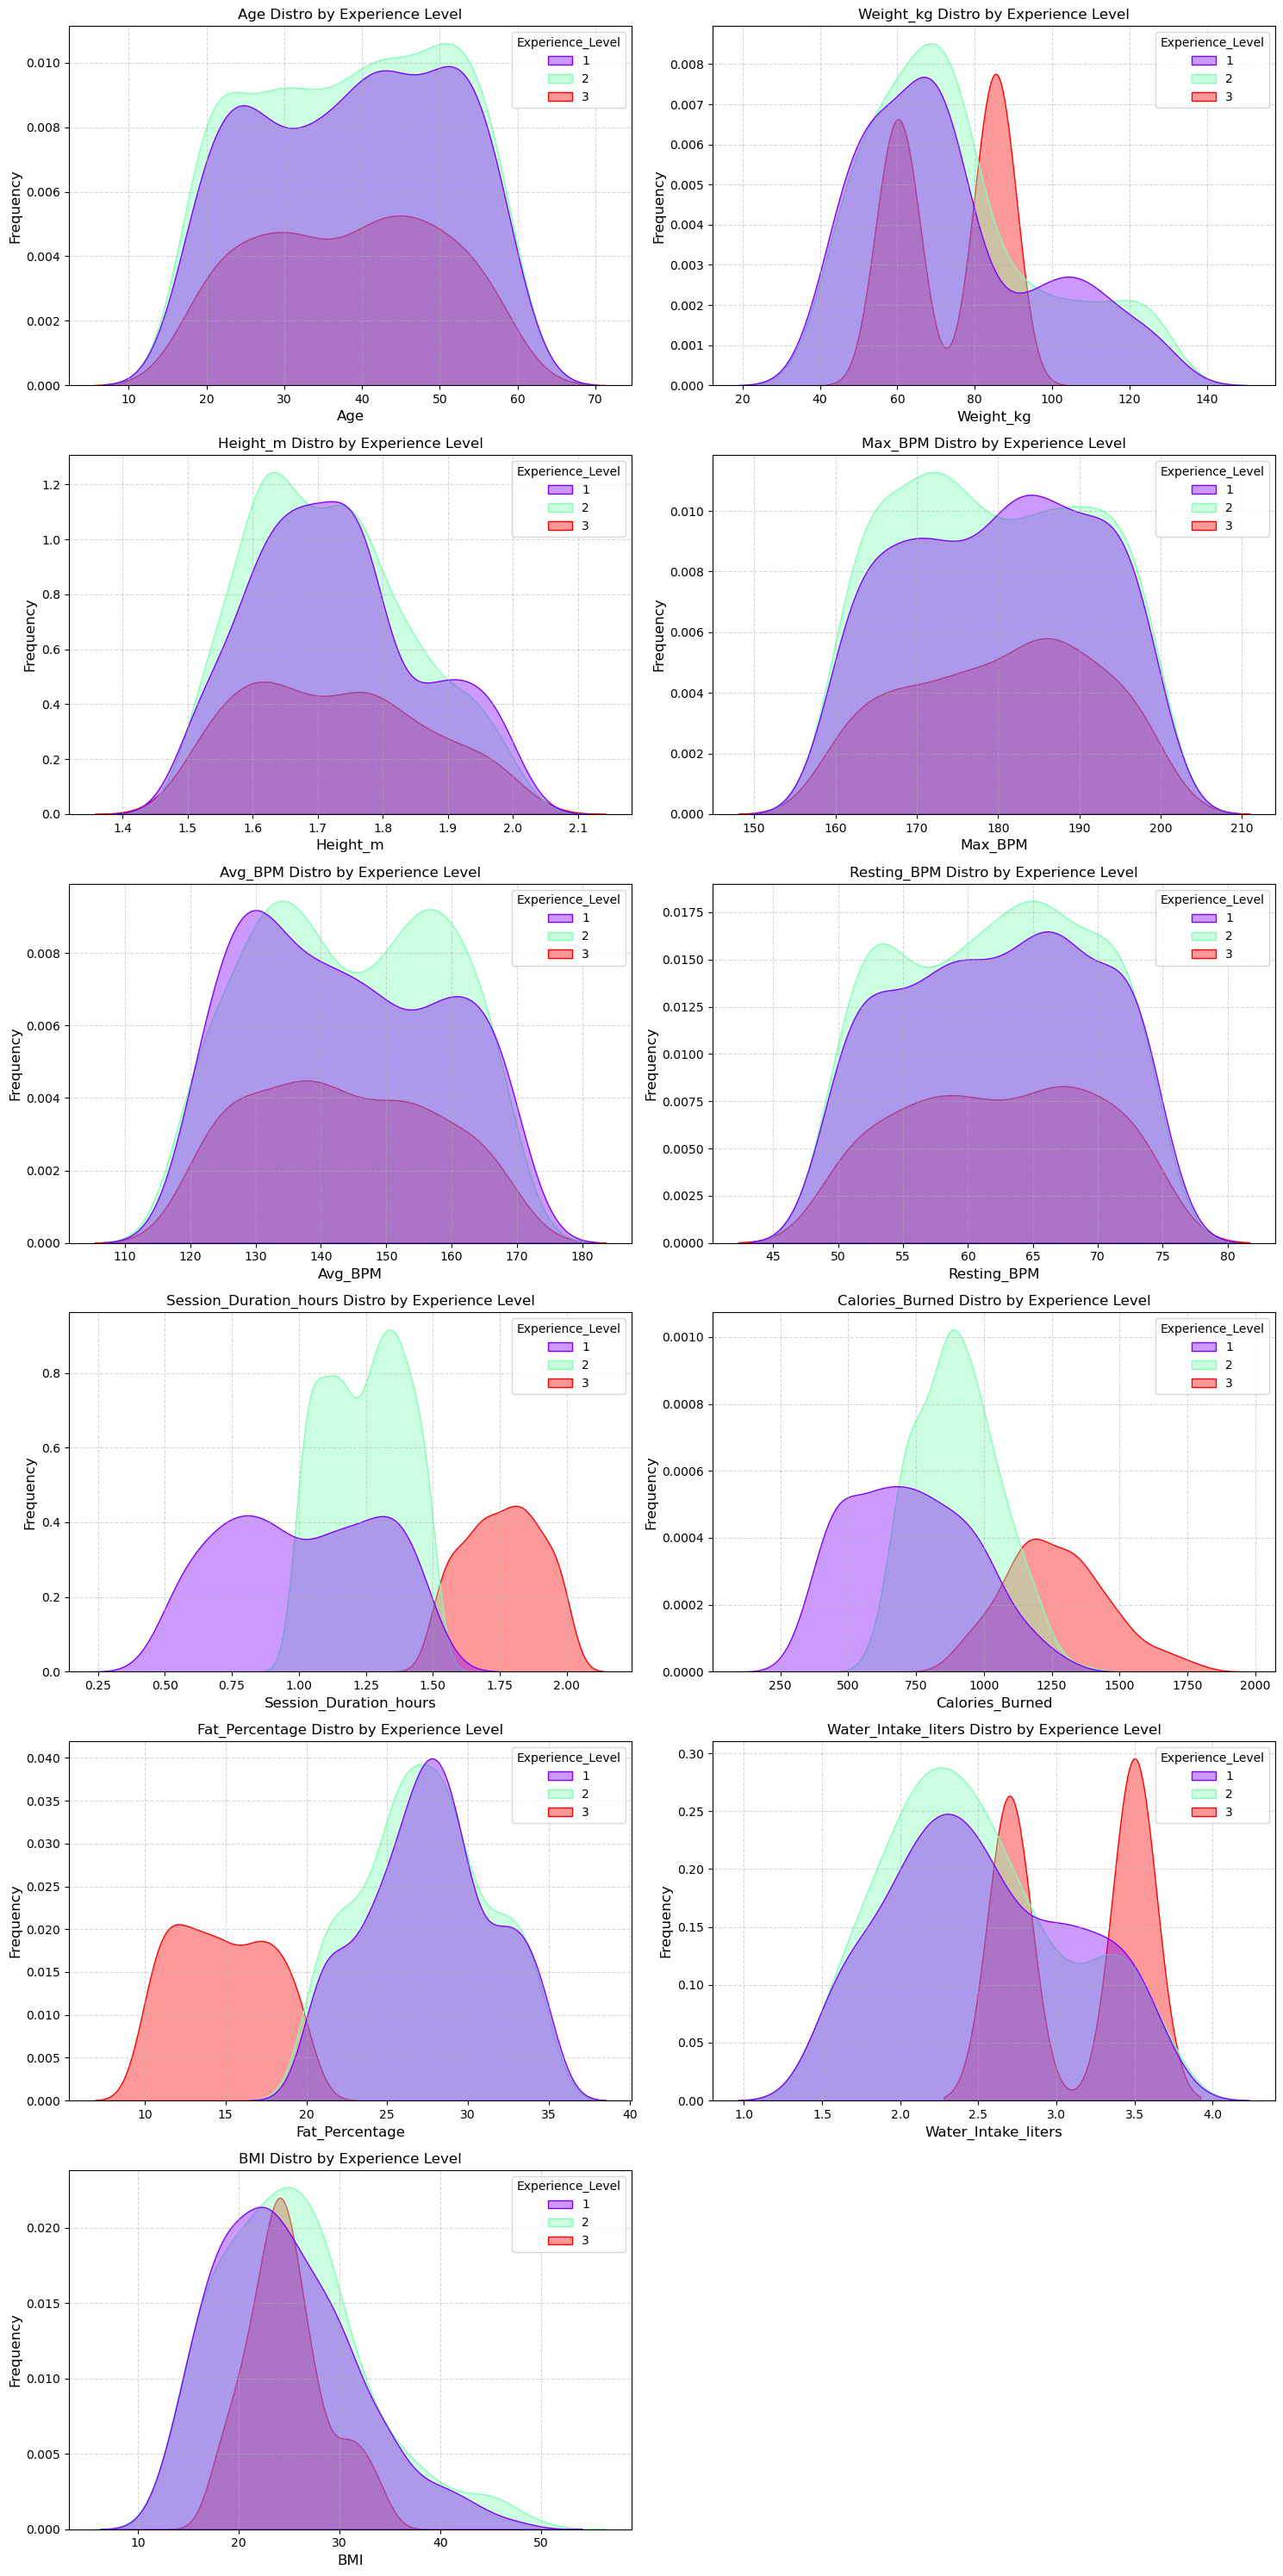

In [27]:
#Using the Ordinal Variables (Workout Frequency and Experience Level), we can do some additional distribution explorations

#Clear plt
plt.clf()

#Set up a sub_df for non_ordinal
Ord_List = ["Workout_Frequency_days_per_week","Experience_Level"]
Non_Ord_df = [col for col in numeric if col not in Ord_List]

col_count = 2
row_count = (len(Non_Ord_df)+1) // col_count

fig, axes = plt.subplots(row_count, col_count, figsize=(15,5*row_count))
axes = axes.flatten() #Have to do this for the for loop coming next

for i, j in enumerate(Non_Ord_df):
    sns.kdeplot(df,x=j,hue=Ord_List[1],fill=True,palette='rainbow',alpha=.4,ax=axes[i])
    axes[i].set_xlabel(j,fontsize=12)
    axes[i].set_ylabel('Frequency',fontsize=12)
    axes[i].grid(visible=True,axis='both',linestyle='--',alpha=.5)
    axes[i].set_title(f'{j} Distro by Experience Level')

for item in range(i + 1, len(axes)):
    fig.delaxes(axes[item])

plt.tight_layout()  # Adjust layout to avoid overlapping
plt.show()

## Distribution Findings vs. Experience Level
* Session Duration shows rather clear segmentation by Experience Level for groups 2 and 3, which group 1 has roughly 50% overlap with group 2. Would be wise to find a measure of 'effective routine' for group 1 workouts to understand if workout times can be equivocated.
    * It is known through other scientific research that calorie burn is not a reliable measure of effective workout due to resting caloric rates showing only small deviations from active caloric rates, therefore the Calories Burned would likely provide errors if measured for this purpose
* Water Intake is bi-modal for Experience Level group 3 days per week groups, could be due to exercise types typically requiring higher frequencies at varied intensity / time levels (running vs. weight lifting).

## Correlation Investigation

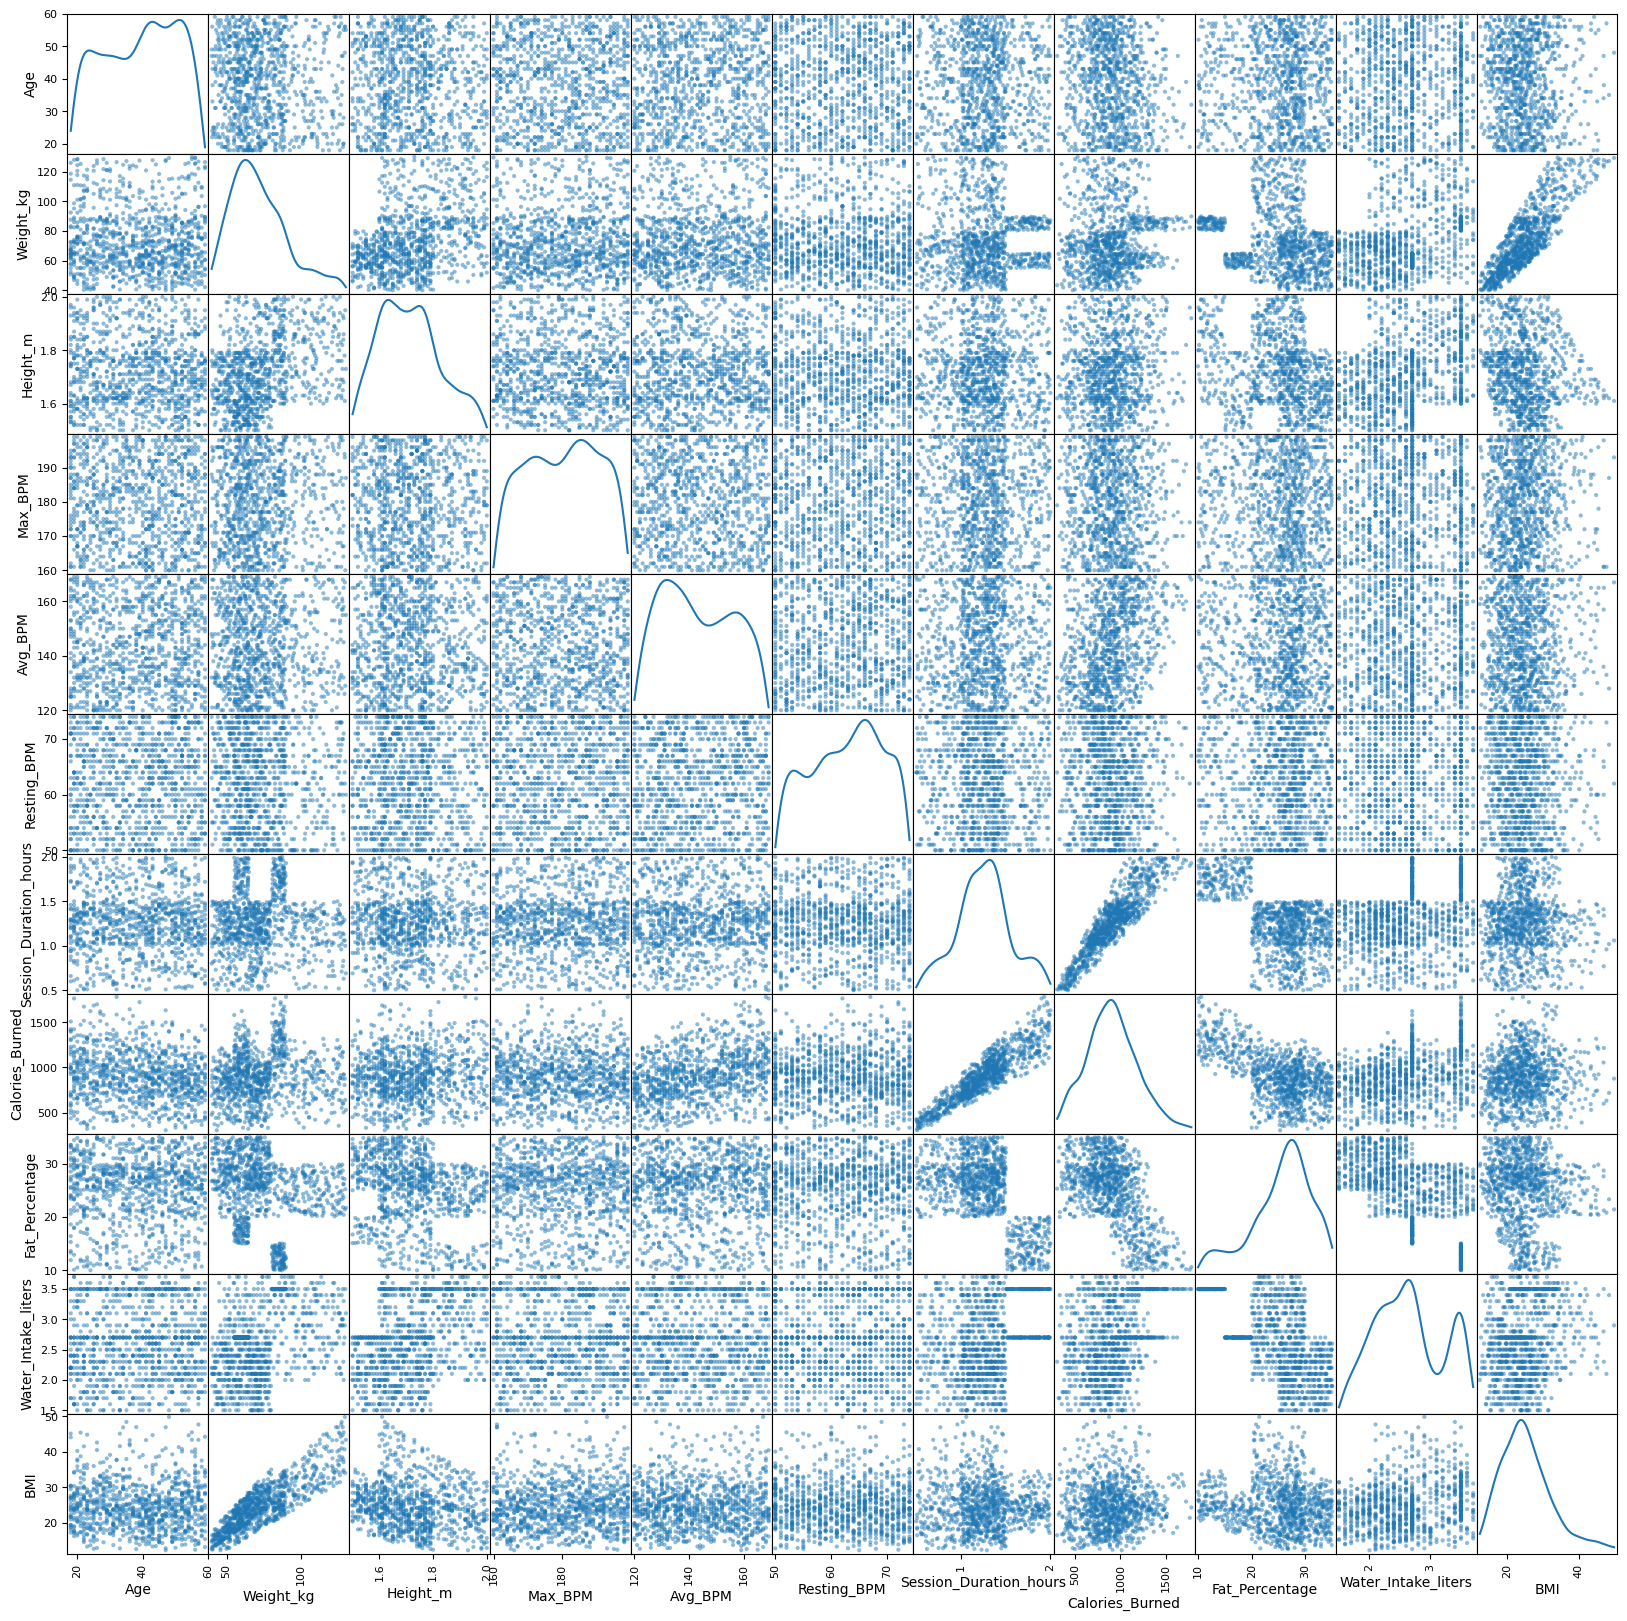

In [14]:
#Correlation Hunt
#Due to CPU Time on Kaggle, I ran this on my home PC a number of times prior to a final run on the site =)
plots = pd.plotting.scatter_matrix(df[Non_Ord_df],diagonal='kde',figsize=(20,20)) #Assigned to variable to remove the large volume of text output showing all the axis arrays

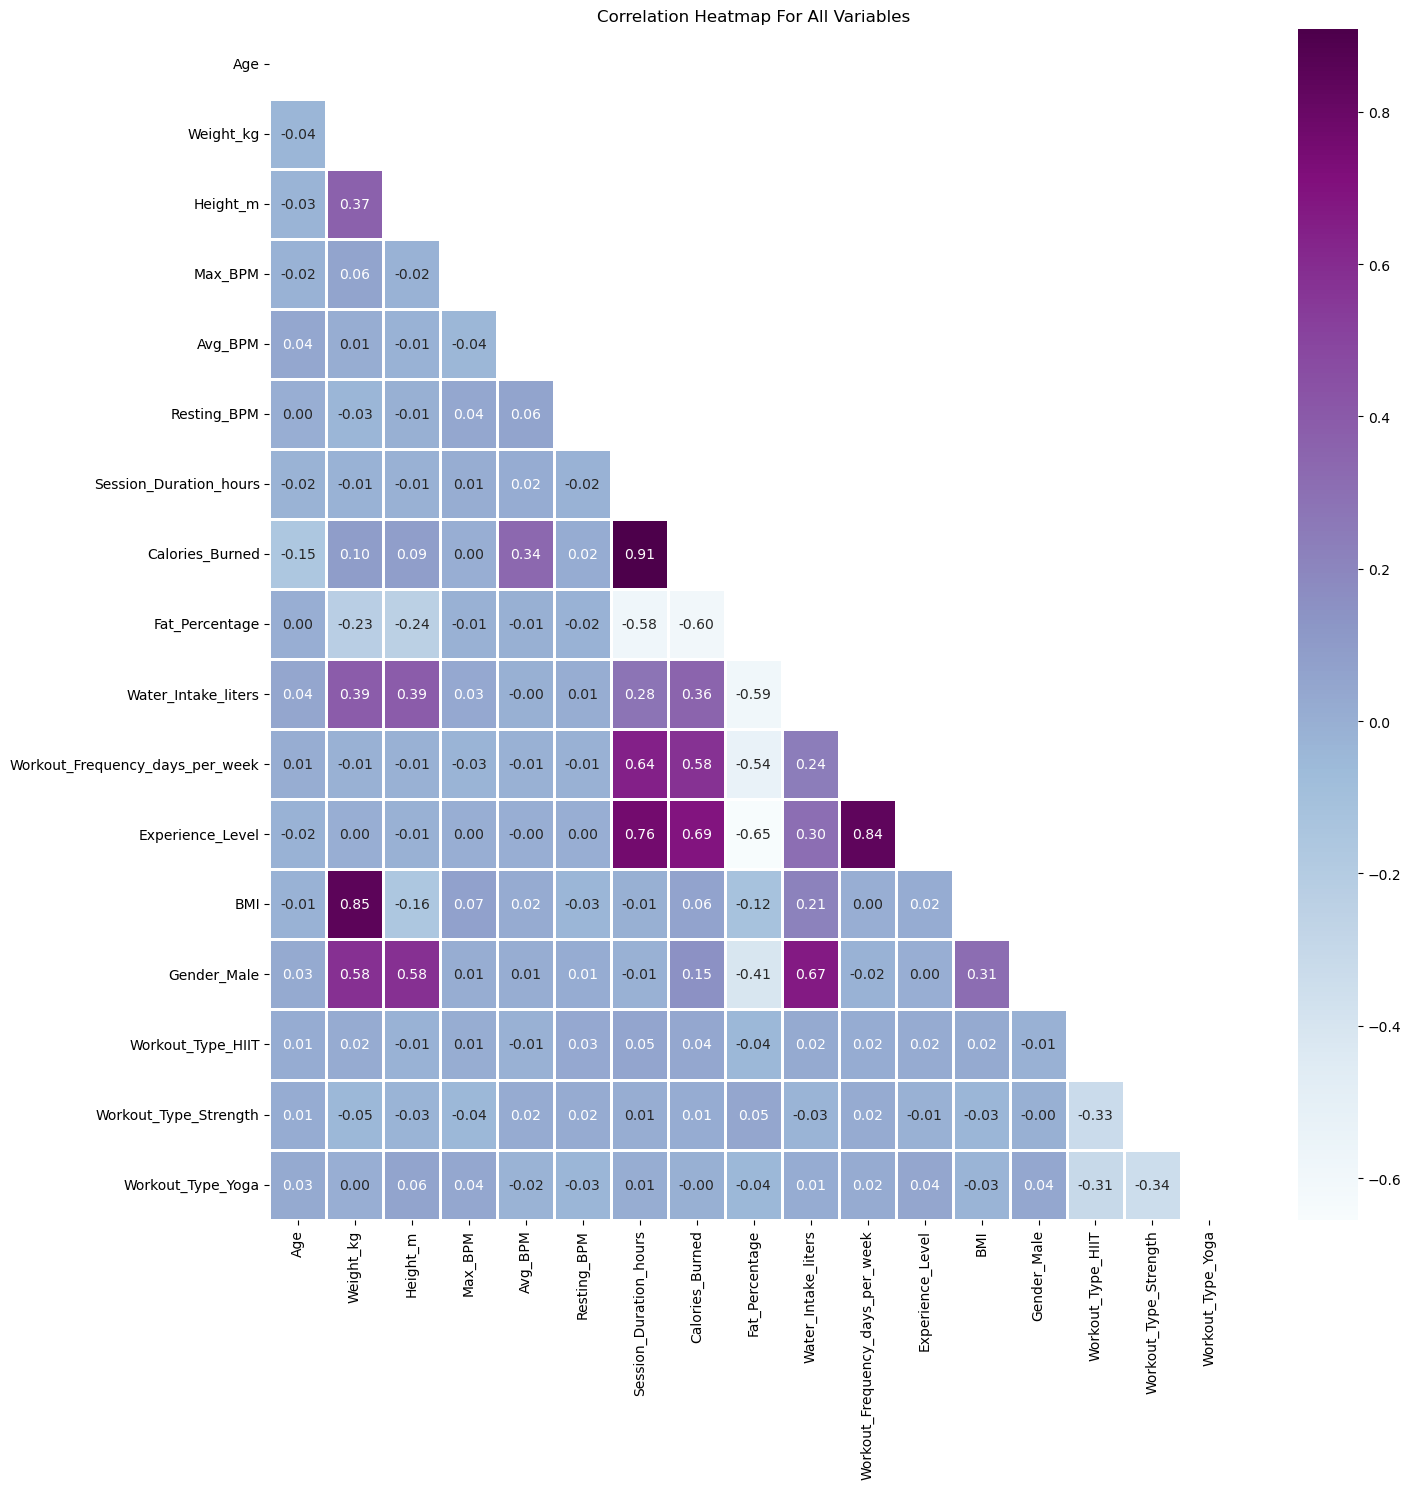

In [29]:
#Since the scatter matrix is not so clear on correlations apart from the obvious (Weight vs BMI, Fat Percentage vs. Session Duration Hours, Session Duration vs. Calories Burned), we will take a numeric approach as well just in case.
plt.figure(figsize=(15,15))
enc_df = pd.get_dummies(df,columns=categorical,drop_first=True) #encoding the categorical values so they work in the heatmap
correlation_matrix = enc_df.corr()

matrix_mask = np.triu(correlation_matrix)#I want to mask the top 1/2 matrix since it is redundant info
sns.heatmap(correlation_matrix, annot=True,cmap='BuPu',fmt='.2f',linecolor='white',linewidth=1,mask=matrix_mask)

plt.title('Correlation Heatmap For All Variables')
plt.tight_layout()
plt.show()

## Correlation Findings

* Clear correlations exist within the data
    * Session Duration Hours vs Calories Burned
    * Experience Level vs. Workout Frequency Days Per Week
    * Weight (kg) vs. BMI
    * Experience Level vs. Session Duration (Hr)
    * Experience Level vs. Calories Burned
    * Gender vs. Water Intake (Lt)